# Traditional Time Series Modeling

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#### Create main dataframe

In [2]:
#Import, sort and filter, describe
df = pd.read_csv('btc_training.csv',index_col="Date",parse_dates=True)
df = df.sort_index(ascending = True)
df = df[(df.index >= '2017-01-01')] # remove tail (where there is little predictive information)
print('\n Data Types:')
print(df.dtypes)
print(df.head(2))
print("")
print(len(df))


 Data Types:
Price       float64
Open        float64
High        float64
Low         float64
Vol2          int64
Change %     object
dtype: object
             Price   Open    High    Low   Vol2 Change %
Date                                                    
2017-01-01   995.4  963.4  1001.6  956.1  41150    3.33%
2017-01-02  1017.0  995.4  1031.7  990.2  64950    2.17%

813


#### Data Prep for Univariate Modeling

In [13]:
#Create univariate time series df
ts = df[['Price', 'Open']]
ts = ts.drop(['Open'], axis = 1)
print(ts.head(24)) #Trades on weekends

             Price
Date              
2017-01-01   995.4
2017-01-02  1017.0
2017-01-03  1033.3
2017-01-04  1135.4
2017-01-05   989.3
2017-01-06   886.2
2017-01-07   888.9
2017-01-08   900.9
2017-01-09   899.8
2017-01-10   904.4
2017-01-11   785.4
2017-01-12   810.1
2017-01-13   824.8
2017-01-14   819.6
2017-01-15   821.2
2017-01-16   827.3
2017-01-17   899.7
2017-01-18   872.0
2017-01-19   895.2
2017-01-20   892.9
2017-01-21   919.8
2017-01-22   918.8
2017-01-23   921.5
2017-01-24   893.8


#### Checking for stationarity

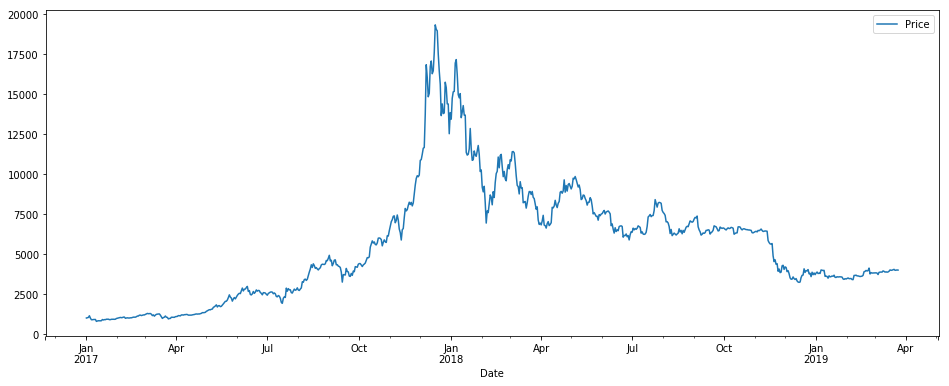

In [6]:
ts.plot(figsize=(16,6))

#### Function for testing stationarity
Dickey and Fuller (1979) developed a procedure for testing whether a variable has a unit root or,
equivalently, that the variable follows a random walk. The null hypothesis is
always that the variable has a unit root. They differ in whether the null hypothesis includes a drift
term and whether the regression used to obtain the test statistic includes a constant term and time
trend. Source: https://www.stata.com/manuals13/tsdfuller.pdf

In [25]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=14) #Trades on weekends
    rolstd = pd.rolling_std(timeseries, window=14)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Std Dev')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Dickey-Fuller Test Results:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).std()
  


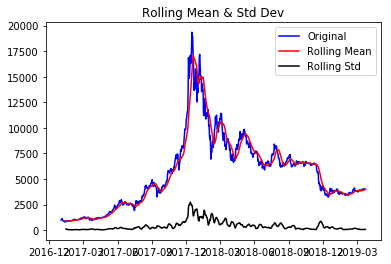

Dickey-Fuller Test Results:
Test Statistic                  -2.089365
p-value                          0.248812
Lags Used                       20.000000
Number of Observations Used    792.000000
Critical Value (10%)            -2.568717
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
dtype: float64


In [27]:
test_stationarity(ts['Price'])

# Making TS Stationary


## Estimating & Eliminating Trend


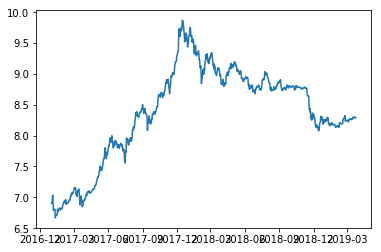

In [19]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing:

### Moving average

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
  """Entry point for launching an IPython kernel.


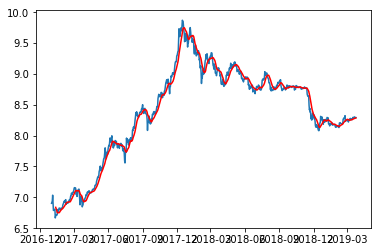

In [28]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [29]:
ts_log_moving_avg_diff = ts_log - moving_avg
print(ts_log_moving_avg_diff.head(12))
ts_log_moving_avg_diff.dropna(inplace=True)
print(ts_log_moving_avg_diff.head())

               Price
Date                
2017-01-01       NaN
2017-01-02       NaN
2017-01-03       NaN
2017-01-04       NaN
2017-01-05       NaN
2017-01-06       NaN
2017-01-07       NaN
2017-01-08       NaN
2017-01-09       NaN
2017-01-10       NaN
2017-01-11       NaN
2017-01-12 -0.140603
               Price
Date                
2017-01-12 -0.140603
2017-01-13 -0.106952
2017-01-14 -0.095294
2017-01-15 -0.074198
2017-01-16 -0.040416


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).std()
  


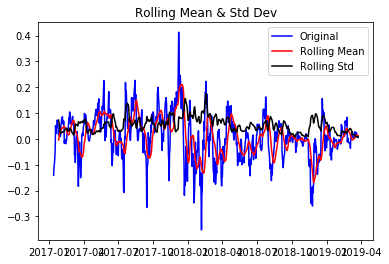

Dickey-Fuller Test Results:
Test Statistic                -7.285082e+00
p-value                        1.466003e-10
Lags Used                      5.000000e+00
Number of Observations Used    7.960000e+02
Critical Value (10%)          -2.568707e+00
Critical Value (1%)           -3.438592e+00
Critical Value (5%)           -2.865178e+00
dtype: float64


In [30]:
test_stationarity(ts_log_moving_avg_diff['Price'])

#### Exponentially Weighted Moving Average (EWMA)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,adjust=True,min_periods=0,halflife=12).mean()
  """Entry point for launching an IPython kernel.


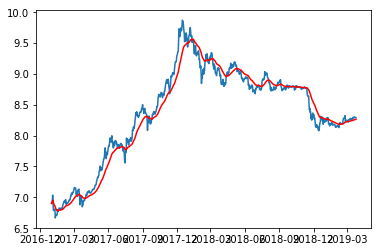

In [31]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).std()
  


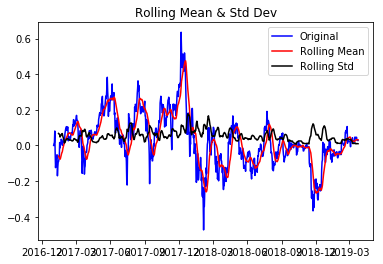

Dickey-Fuller Test Results:
Test Statistic                  -3.761376
p-value                          0.003328
Lags Used                        4.000000
Number of Observations Used    808.000000
Critical Value (10%)            -2.568678
Critical Value (1%)             -3.438469
Critical Value (5%)             -2.865124
dtype: float64


In [34]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff['Price'])

## Eliminating Trend & Seasonality

### Differencing:

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).std()
  


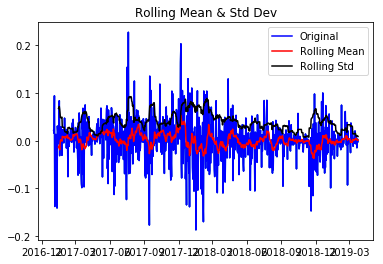

Dickey-Fuller Test Results:
Test Statistic                -1.221113e+01
p-value                        1.163121e-22
Lags Used                      4.000000e+00
Number of Observations Used    8.070000e+02
Critical Value (10%)          -2.568681e+00
Critical Value (1%)           -3.438479e+00
Critical Value (5%)           -2.865128e+00
dtype: float64


In [36]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff['Price'])

### Decomposition:

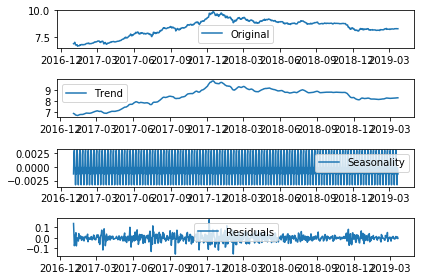

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).std()
  


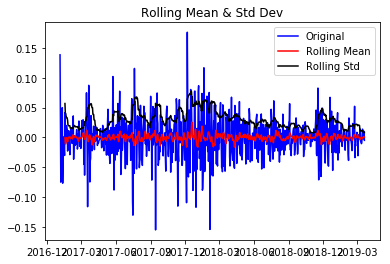

Dickey-Fuller Test Results:
Test Statistic                -1.217861e+01
p-value                        1.367874e-22
Lags Used                      1.600000e+01
Number of Observations Used    7.900000e+02
Critical Value (10%)          -2.568722e+00
Critical Value (1%)           -3.438655e+00
Critical Value (5%)           -2.865205e+00
dtype: float64


In [39]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose['Price'])

## Forecasting

#### ACF & PACF Plots

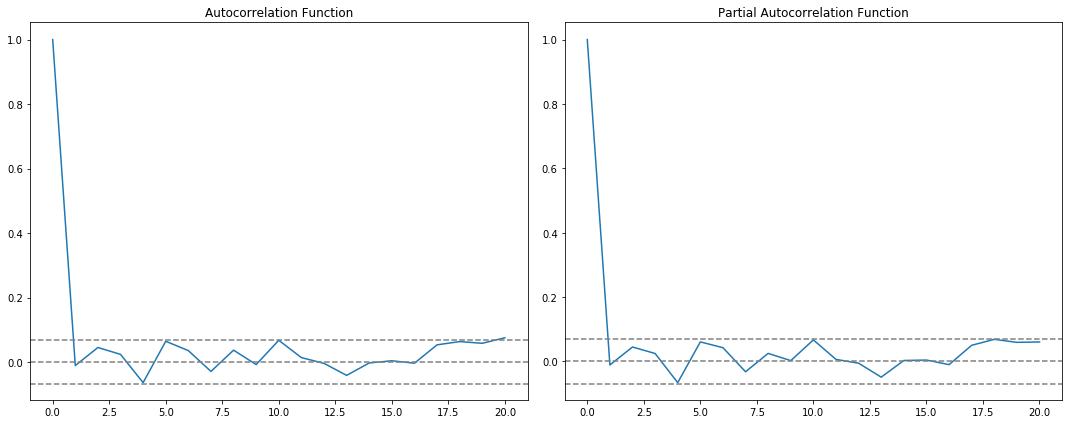

In [41]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

In [ ]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))